<a href="https://colab.research.google.com/github/ekolonsky/RIA_news/blob/main/RIA_Novosti_Verbs_of_Speech_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Verbs of speech frequency over time

In [6]:
# install packages for NLP
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 8.2 MB 8.6 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=b92204e61c376d7bf07b8f3d13b7597cab2940cf5c8ed8e8c3756740c7786eb9
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [7]:
import requests, re
from collections import Counter
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru')
# пример - морфологический разбора слова "идём" 
print(morph.parse('идём'))
normal = {}

[Parse(word='идём', tag=OpencorporaTag('VERB,impf,intr plur,1per,pres,indc'), normal_form='идти', score=0.5, methods_stack=((DictionaryAnalyzer(), 'идём', 1696, 2),)), Parse(word='идём', tag=OpencorporaTag('VERB,impf,intr sing,impr,incl'), normal_form='идти', score=0.5, methods_stack=((DictionaryAnalyzer(), 'идём', 1696, 11),))]


In [2]:
# normal: word -> normal form of word
import cloudpickle as cp
from urllib.request import urlopen

url = 'https://github.com/ekolonsky/RIA_news/raw/main/'

normal = cp.load(urlopen(url + "normal.pkl")) 

print(len(normal), normal['москве'])

415973 москва


In [3]:
  # Функция для разбиений на токены

separators = ';', ',', '"', ':', '.','!', '?', ' ', '`', '%','$','*','(',')','—'
regex_punctuation = '|'.join(map(re.escape, separators))
url = 'https://github.com/ekolonsky/RIA_news/raw/main/'


def get_stopwords():
    req = requests.get(url + 'stopwords.txt')
    ans = req.text.split()
    return ans
stopwords = get_stopwords() # затем сделаем загрузку из словаря стоп-слов

def get_speechverbs():
    req = requests.get(url + 'speech_verbs.txt')
    ans = req.text.split()
    return ans
speechverbs = get_speechverbs() 

def normalize(word):
    word = word.lower()
    if word not in normal:
      normal[word] = morph.parse(word)[0].normal_form
    return normal[word]

def tokenize(text):
    text = text.lower()
    tokens = [normalize(word) for word in re.split(regex_punctuation,text)  
      if not word.isnumeric()
      and word != ''] 
    return [w for w in tokens if w not in stopwords] 


# пример
tokenize('В Москве назвали победителей Гран-при 15 Московского кинофестиваля "Минотавр".')

['москва',
 'назвать',
 'победитель',
 'гран-при',
 'московский',
 'кинофестиваль',
 'минотавр']

In [4]:
# функция для извлечения даты новости из строки со ссылкой на новость
def get_date(link):
  pattern = r'\/20[0-2][0-9][0-1][0-9][0-3][0-9]\/'
  result = re.search(pattern, link)

  if result:
    return result[0][1:-1]
  else:
    return ''
  return 

# пример
get_date('https://ria.ru/20041229/774359.html	Жерар Депардье открыл в Париже второй ресторан')

'20041229'

## Read and count news frequency with speechverbs

In [10]:
%%time
#url = 'https://raw.githubusercontent.com/ekolonsky/RIA_news/main/'
url = 'https://github.com/ekolonsky/RIA_news/raw/main/'
filenames = ['ria-{:02d}-1.txt'.format(i) for i in range(2,23)] 
filenames += ['ria-{:02d}-2.txt'.format(i) for i in range(2,23)]
#filenames = ['ria-{:02d}-1.txt'.format(i) for i in range(13,15)]  # quick test

total, selected = Counter(), Counter()



for filename in filenames:
  print(filename)
  req = requests.get(url + filename)
  for line in req.text.splitlines():
    sep = line.find('\t')
    if sep == -1:
      continue
    link, news = line[:sep],line[sep+1:]
    tokens = tokenize(news)
  
    date = get_date(link)
    year = date[:4]

    total[year] += 1

    if any(word in speechverbs for word in tokens):
      selected[year] += 1



ria-02-1.txt
ria-03-1.txt
ria-04-1.txt
ria-05-1.txt
ria-06-1.txt
ria-07-1.txt
ria-08-1.txt
ria-09-1.txt
ria-10-1.txt
ria-11-1.txt
ria-12-1.txt
ria-13-1.txt
ria-14-1.txt
ria-15-1.txt
ria-16-1.txt
ria-17-1.txt
ria-18-1.txt
ria-19-1.txt
ria-20-1.txt
ria-21-1.txt
ria-22-1.txt
ria-02-2.txt
ria-03-2.txt
ria-04-2.txt
ria-05-2.txt
ria-06-2.txt
ria-07-2.txt
ria-08-2.txt
ria-09-2.txt
ria-10-2.txt
ria-11-2.txt
ria-12-2.txt
ria-13-2.txt
ria-14-2.txt
ria-15-2.txt
ria-16-2.txt
ria-17-2.txt
ria-18-2.txt
ria-19-2.txt
ria-20-2.txt
ria-21-2.txt
ria-22-2.txt
CPU times: user 3min 35s, sys: 1.26 s, total: 3min 37s
Wall time: 5min 3s


2002 131914 12071 0.09150658762527102
2003 94182 7007 0.07439850502219107
2004 136974 10966 0.0800589892972389
2005 89136 6531 0.0732700592353258
2006 68754 6645 0.09664892224452395
2007 84873 7525 0.08866188304879055
2008 109435 8293 0.0757801434641568
2009 129409 9904 0.07653254410435133
2010 156937 12795 0.08152953095828262
2011 187429 16881 0.09006610503177204
2012 175841 16267 0.09250971047707872
2013 187527 18020 0.09609282929924758
2014 156781 17509 0.11167807323591507
2015 224856 22851 0.1016250400256164
2016 202099 31218 0.15446884942528166
2017 168791 41963 0.2486092267952675
2018 166210 49553 0.2981348895974971
2019 177376 53882 0.30377277647483314
2020 163126 49117 0.3010985373269742
2021 139511 46627 0.3342173735404377
2022 160916 51073 0.31738919684804495


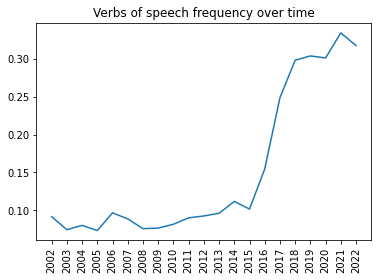

In [11]:
import matplotlib.pylab as plt

freq = {}
for year in total:
  freq[year] = selected[year]/total[year]
  print(year, total[year], selected[year], freq[year])

lists = sorted(freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

ax = plt.gca()
plt.draw()

ax.tick_params(axis='x', labelrotation = 90)
plt.title("Verbs of speech frequency over time")
plt.show()